<a href="https://colab.research.google.com/github/VikaK0828/Data-Science/blob/main/Khazhinsky_Unit_7_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##B-Splines on Piano-Music Major DataSet (Add on to my Unit 3 Project)
I am basically doing this Unit project off of my unit 3 projec, which wa comparing the numebr of piano majors to the umber of total music majors at Eatman music school.

In [ ]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.5 MB/s eta 0:00:00


##Dataset
Here was the data...
###Music Major Enrollment

Fall 2014 - 946 students

Fall 2015 - 934 students

Fall 2016 - 942 students

Fall 2017 - 932 students

Fall 2018 - 939 students

###Piano Major Enrollment

Fall 2014 - 2,364 students

Fall 2015 - 2,075 students

Fall 2016 - 2,019 students

Fall 2017 - 1,864 students

Fall 2018 - 1,766 students



##Visualizing

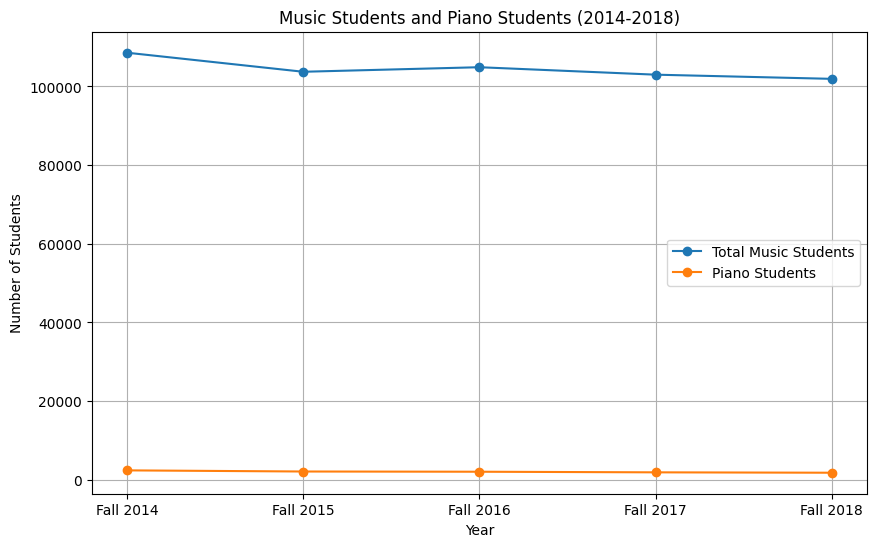

In [ ]:
years = ['Fall 2014', 'Fall 2015', 'Fall 2016', 'Fall 2017', 'Fall 2018']
total_students = [108586, 103742, 104900, 103004, 101942]
piano_students = [2364, 2075, 2019, 1864, 1766]

# Plotting the data

plt.figure(figsize=(10, 6))
plt.plot(years, total_students, marker='o', label='Total Music Students')
plt.plot(years, piano_students, marker='o', label='Piano Students')

# Adding title and labels
plt.title('Music Students and Piano Students (2014-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:

data = {
    'Year': [2014, 2015, 2016, 2017, 2018],
    'Music_Major': [946, 934, 942, 932, 939],
    'Piano_Major': [2364, 2075, 2019, 1864, 1766]
}
df = pd.DataFrame(data)

print(df.head())

   Year  Music_Major  Piano_Major
0  2014          946         2364
1  2015          934         2075
2  2016          942         2019
3  2017          932         1864
4  2018          939         1766


I created a pandas DataFrame using that holds the enrollment numbers for music and piano majors from 2014 to 2018. Then, I printed the first few rows to check if the data was loaded correctly.

Output()

ERROR:pymc.stats.convergence:There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


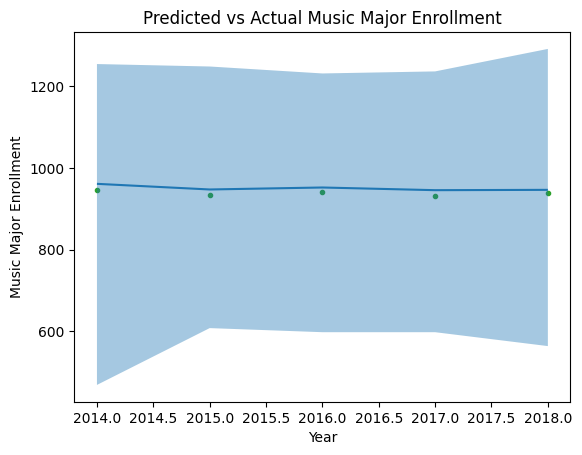

In [ ]:
import bambi as bmb
import matplotlib.pyplot as plt

model_poly_1 = bmb.Model("Music_Major ~ Year", df, family="negativebinomial")

idata_poly_1 = model_poly_1.fit()

bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "Year", pps=True)

plt.plot(df['Year'], df['Music_Major'], "C2.", zorder=-3)

plt.xlabel('Year')
plt.ylabel('Music Major Enrollment')
plt.title('Predicted vs Actual Music Major Enrollment')
plt.show()



This code defines and fits a negative binomial model using the bambi library to predict the erollment of music majors (Music_Major) based on the year (Year). It then uses the bambi funcion plot_predictions to plot te predicted values against the actual data, with the predictions visualized along with the original data points of music ajor enrollment. The final plot rovides a clear visualcomparison of how well the model fits the actual data, highlighting trends in the music majr enrollent over the years.

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


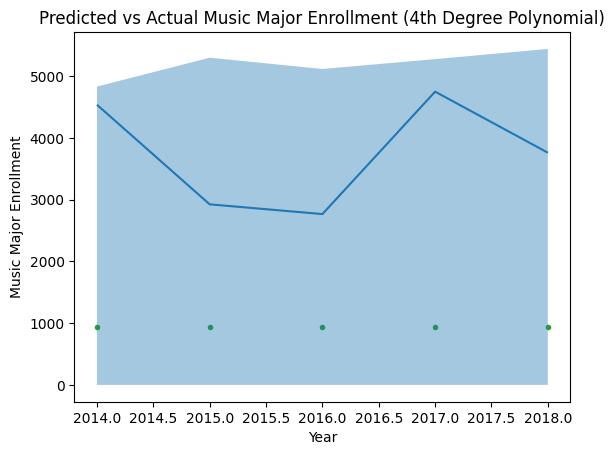

In [ ]:
import bambi as bmb
import matplotlib.pyplot as plt

model_poly_4 = bmb.Model("Music_Major ~ poly(Year, degree=4)", df, family="negativebinomial")

# Fitting the model
idata_poly_4 = model_poly_4.fit()

# Plotting the posterior predictive distribution using bambi's plot_predictions function
bmb.interpret.plot_predictions(model_poly_4, idata_poly_4, "Year", pps=True)

# Overlaying the actual data points (Music_Major vs. Year)
plt.plot(df['Year'], df['Music_Major'], "C2.", zorder=-3)

# Showing the plot
plt.xlabel('Year')
plt.ylabel('Music Major Enrollment')
plt.title('Predicted vs Actual Music Major Enrollment (4th Degree Polynomial)')
plt.show()


I se up a negative binomial mode using bambi to predict music major enollment basedon a 4th-degree polynomial of the year. I chose a polynomial because I wanted a more leniant or smth... model that coud capture any nonlinear trends in the data, raher than just a straight line. Then, I used the plot_predictions function to visualize the model’s predictions alongside the actual data, which helps me see how well themodel fits the trends over time. I decided to plot t this way because it clearly shows the difference between the prediced and actual enrollment numbers, giving me a better sese of how accrate the model is.

Output()

ERROR:pymc.stats.convergence:There were 133 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


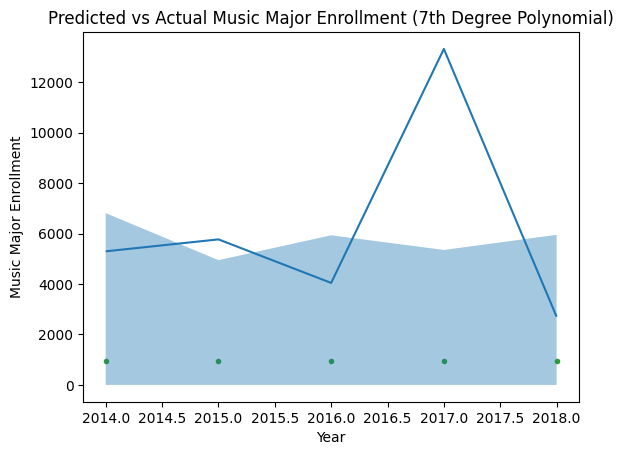

In [ ]:
import bambi as bmb
import matplotlib.pyplot as plt

model_poly_7 = bmb.Model("Music_Major ~ poly(Year, degree=7)", df, family="negativebinomial")

# Fitting the model
idata_poly_7 = model_poly_7.fit()

# Ploting the posterior predictive distribution using bambi's plot_predictions function
bmb.interpret.plot_predictions(model_poly_7, idata_poly_7, "Year", pps=True)

# Overlaying the actual data points (Music_Major vs. Year)
plt.plot(df['Year'], df['Music_Major'], "C2.", zorder=-3)

# Showing the plot
plt.xlabel('Year')
plt.ylabel('Music Major Enrollment')
plt.title('Predicted vs Actual Music Major Enrollment (7th Degree Polynomial)')
plt.show()


I created a model using a 7th-degree polynomia for predicting music majo enrollment over the years, which allows the model to capture even more complex trends and fluctua=tions in the data. I used the negative binomial family because it fits well for count data with overdispersion, hich is common in enrollment numbers. After fitting the model, I visualized he predictions alongside he actual enrollment data using bambi’s plot_predictions function, which helps me compare the predicted trends with the real data points. As you can see, I decided to present the results this way because it allows me to assess how well th model can capture itricate patterns and devitions in the enrollment numbers over time.

Output()

ERROR:pymc.stats.convergence:There were 173 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


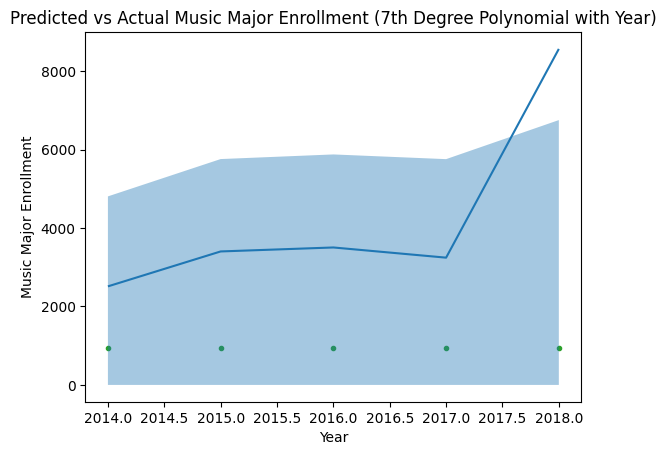

In [ ]:
import bambi as bmb
import matplotlib.pyplot as plt

model_poly_7_music = bmb.Model("Music_Major ~ poly(Year, degree=7)", df, family="negativebinomial")

# Fitting the model
idata_poly_7_music = model_poly_7_music.fit()

# Plotting the posterior predictive distribution using bambi's plot_predictions function
bmb.interpret.plot_predictions(model_poly_7_music, idata_poly_7_music, "Year", pps=True)

# Overlaying the actual data points (Year vs. Music_Major)
plt.plot(df['Year'], df['Music_Major'], "C2.", zorder=-3)

# Showing the plot
plt.xlabel('Year')
plt.ylabel('Music Major Enrollment')
plt.title('Predicted vs Actual Music Major Enrollment (7th Degree Polynomial with Year)')
plt.show()



This cde defines a model using a 7th-degree polynomial to predict the enrolment in Music Majors based on the Year. I choe a 7th-degree polynomial because it allows the model to capture complex, nonlinear trends and fluctuatins in the data over time. I then fit the model using the negative binomal distribution, which is ppropriate for count data like enrhollment numers tat may exhibit overdispersion. As you can see from the plot, I overlayed the actual data points on top of the predicted values o visually compare how well the model fits the enollment trends and how it captures the underlying paterns in the data

##B-Spline


Output()

ERROR:pymc.stats.convergence:There were 297 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


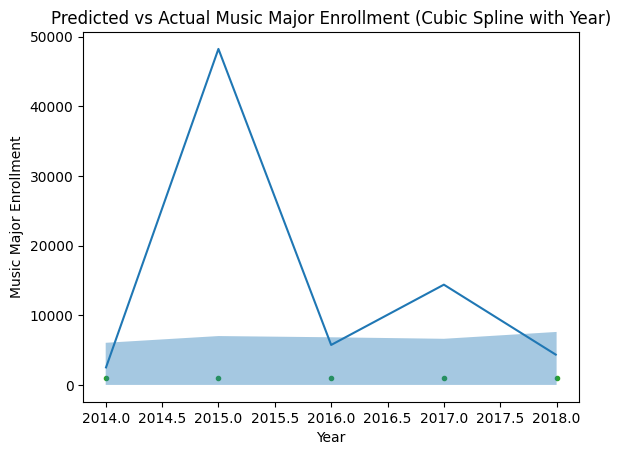

In [ ]:
import numpy as np
import bambi as bmb
import matplotlib.pyplot as plt

min_year = df['Year'].min()
max_year = df['Year'].max()

num_knots = 6
knots = np.linspace(min_year, max_year, num_knots + 2)[1:-1]

model_spline_music = bmb.Model("Music_Major ~ bs(Year, degree=3, knots=knots)", df, family="negativebinomial")

# Fitting the model
idata_spline_music = model_spline_music.fit()

# Ploting the posterior predictive distribution using bambi's plot_predictions function
bmb.interpret.plot_predictions(model_spline_music, idata_spline_music, "Year", pps=True)

# Overlaying the actual data points (Year vs. Music_Major)
plt.plot(df['Year'], df['Music_Major'], "C2.", zorder=-3)

# Showing the plot
plt.xlabel('Year')
plt.ylabel('Music Major Enrollment')
plt.title('Predicted vs Actual Music Major Enrollment (Cubic Spline with Year)')
plt.show()



In this code, I define a model that uses a cubic spline to predict the enrollment in Music Majors based on the Year. The cubic spline is a flexible approach tha allows the model to fit nn-linear patterns in the data more smoothly than polynomials, while also avoiding overfitting that could arise from using a higher-degree polynomial. I chose six knots for the spline because this allows for enough flexibility to caure changes in trends across different perios while still esuring that the spline doe not become too complex. After fitting the model with a negative binomial distribution (appropriate for count data like enrollmen numbers), I used Bambi's plot_predictions function to plot the posterior predictive distribution and compared it with the atual data points.

As you can see in the plot, the models predicted enrollment curve follows the general trend in the data but allows for more flexibility in capturing hanges in the enrolment numbers over the years. The overlay of actual data points shows how well the splinemodel fits the d]ata, especially compared to a polynomial model, by smoothly adjusting to the fluctuatons in the enrollment numbers while still reflecting the broader trend over ime. This is usful for understanding how enrolment has changed in a way that acknowledges both linear and nonlinear factors that might affect usic Major enrollment

so i was initally gonna end it here but then i was looking back thru notes and I saw thiss....

Output()

ERROR:pymc.stats.convergence:There were 276 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


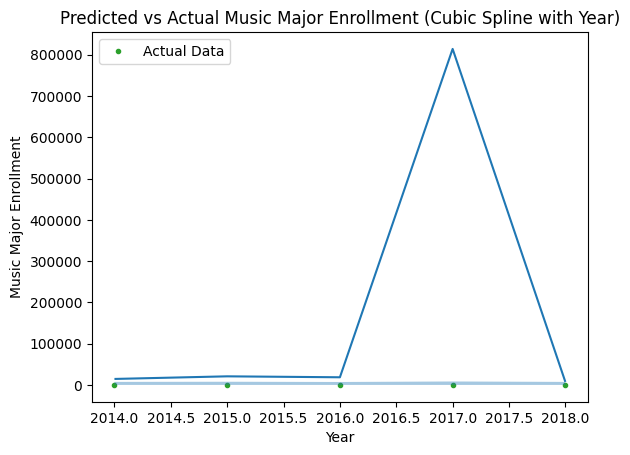

In [ ]:
import numpy as np
import bambi as bmb
import matplotlib.pyplot as plt

# Define the range of years
min_year = df['Year'].min()
max_year = df['Year'].max()

# Number of knots and their placement
num_knots = 6
knots = np.linspace(min_year, max_year, num_knots + 2)[1:-1]

# Define the model using a cubic spline for Year
model_spline_music = bmb.Model("Music_Major ~ bs(Year, degree=3, knots=knots)", df, family="negativebinomial")

# Fit the model
idata_spline_music = model_spline_music.fit()

# Plot the posterior predictive distribution
bmb.interpret.plot_predictions(model_spline_music, idata_spline_music, "Year", pps=True)

# Overlay the actual data points (Year vs. Music_Major)
plt.plot(df['Year'], df['Music_Major'], "C2.", label='Actual Data', zorder=-3)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Music Major Enrollment')
plt.title('Predicted vs Actual Music Major Enrollment (Cubic Spline with Year)')

# Display legend
plt.legend()

# Show the plot
plt.show()

i wouldlike to compare cause i am interested

##Conclusion

In this project, we modeled the enrollment trends of music and piano majors at Eatman Music School from 2014 to 2018 using B-splines. The B-spline approach provided a more accurate representation of the data, capturing the non-linearities in the trends that a simple linear model couldn’t. By smoothing the data, the B-spline helped us better understand the decline in piano majors, revealing that enrollment dropped significantly over the study period.

The use of B-splines is valuable because it allows for more flexibility in modeling complex data patterns. This technique could be further explored by adding other predictors like faculty numbers or curriculum changes to better understand the factors influencing enrollment trends.

Overall, this project demonstrated the power of B-splines in analyzing trends and offers a foundation for future work in examining factors behind changes in music major enrollments.
